In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import wradlib
import pyart
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
radar = pyart.io.read('MDV-20150805-084449-PPIVol.nc')

In [3]:
dbz=radar.fields['DBZH']['data']
dbz[dbz==-32768]=np.nan
dbz.shape

(9270, 2500)

In [4]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])

# Rainfall Rate

In [5]:
z=dbz
b=1.6
a=200
R=(z/a)**(1/b)
np.shape(R)

(9270, 2500)

In [6]:
mask_dict = {'data': R, 'units': 'mm/hr', 'long_name': 'rain rate', 'standard_name': 'R'}
radar.add_field('R',mask_dict)

In [7]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'R'])

In [8]:
RR = pyart.retrieve.est_rain_rate_z(radar, alpha=200, beta=1.6, refl_field='DBZH', rr_field='r_rate')

In [9]:
RR = RR['data'].mask

In [10]:
mask_dict = {'data': RR, 'units': 'mm/hr', 'long_name': 'rain rate', 'standard_name': 'R'}
radar.add_field('RR',mask_dict)

In [11]:
dr=R-RR

In [12]:
dr

masked_array(
  data=[[0.15852566063404083, 0.19811314344406128, 0.21027310192584991,
         ..., --, --, --],
        [0.13374805450439453, 0.18975196778774261, 0.21027310192584991,
         ..., --, --, --],
        [0.14891330897808075, 0.18548759818077087, 0.19811314344406128,
         ..., --, --, --],
        ...,
        [0.13891306519508362, 0.167800173163414, 0.18975196778774261,
         ..., --, --, --],
        [0.13891306519508362, 0.167800173163414, 0.18975196778774261,
         ..., --, --, --],
        [0.12846048176288605, 0.17232351005077362, 0.20626769959926605,
         ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-32768,
  dty

In [13]:
mask_dict = {'data': dr, 'units': 'mm/hr', 'long_name': 'rain rate', 'standard_name': 'rain rate'}
radar.add_field('dr',mask_dict)

In [14]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'R', 'RR', 'dr'])

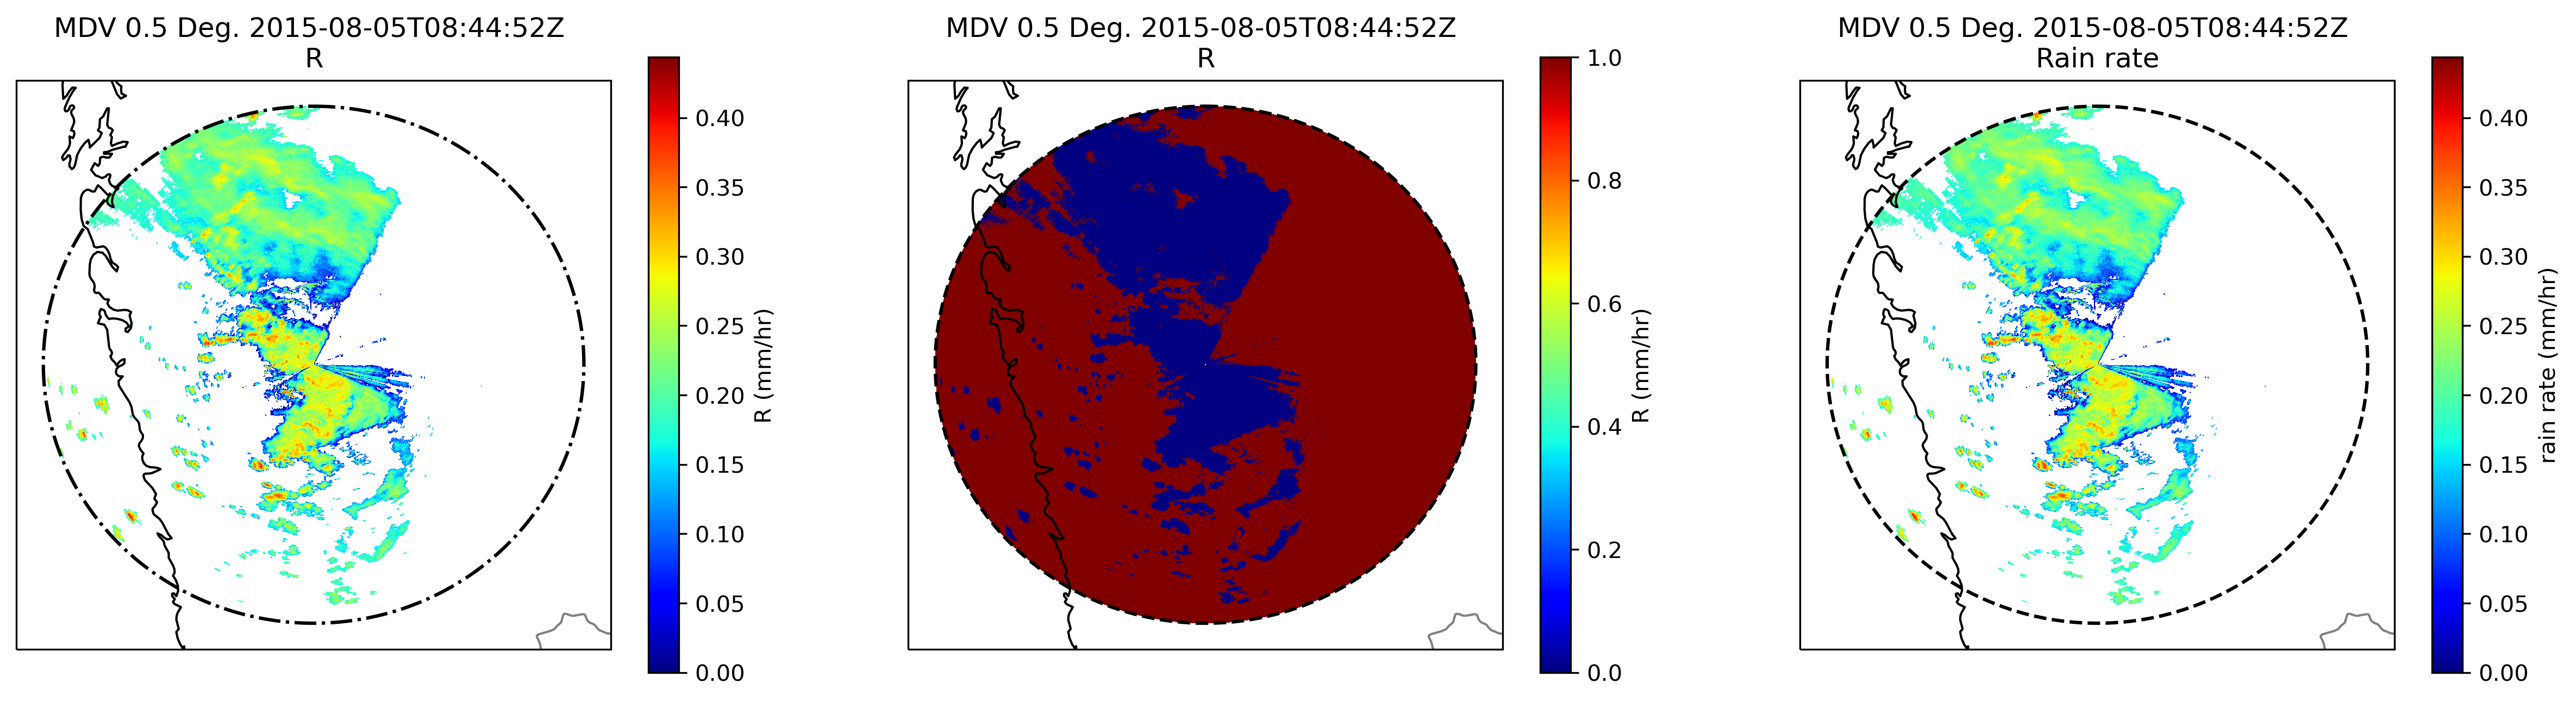

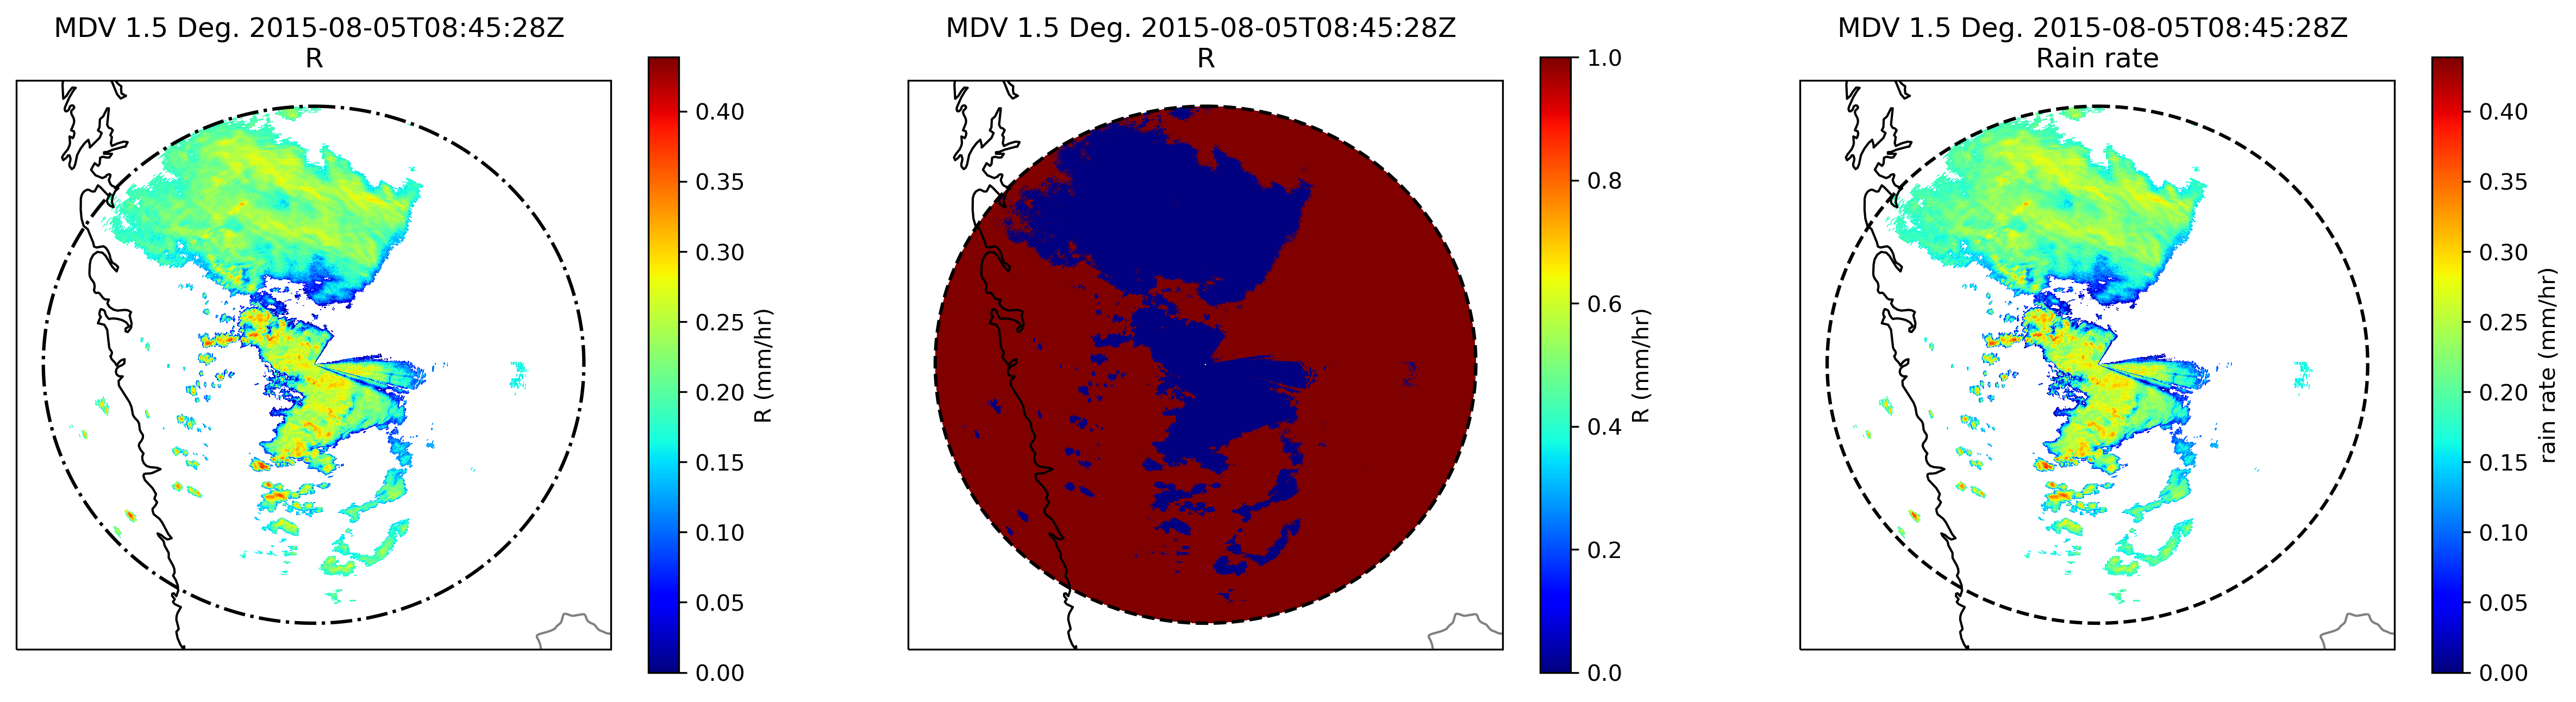

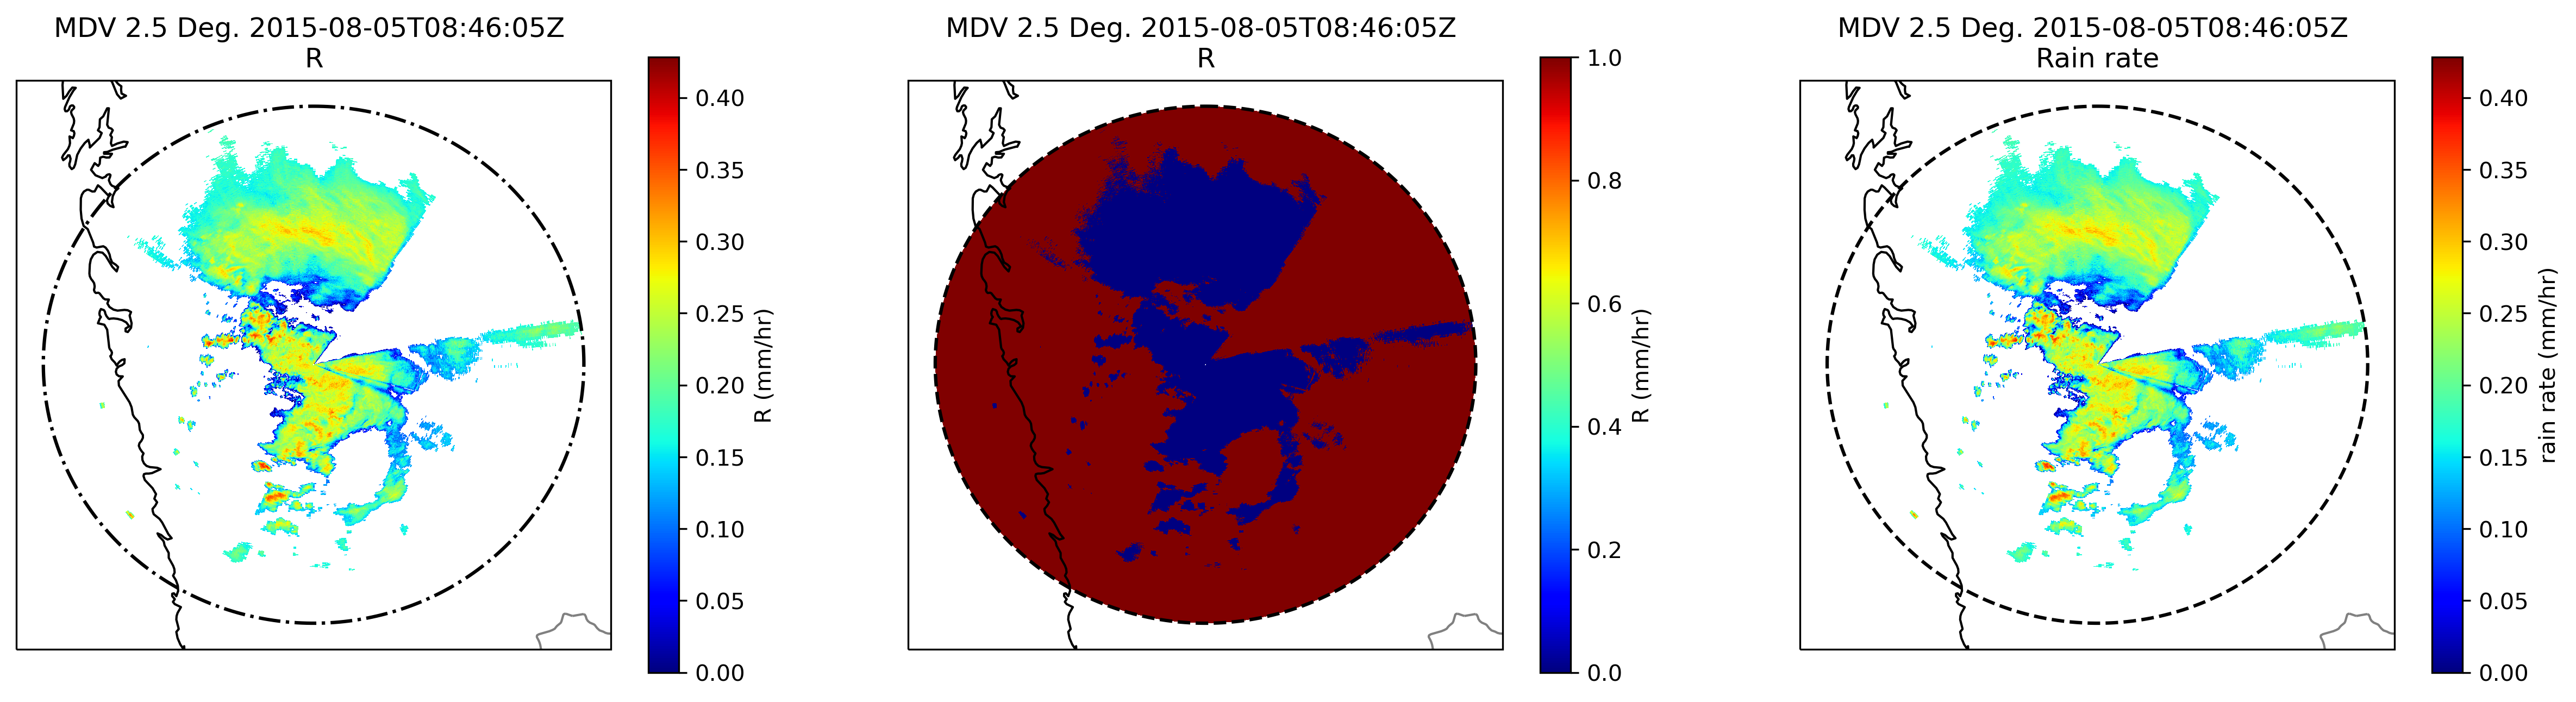

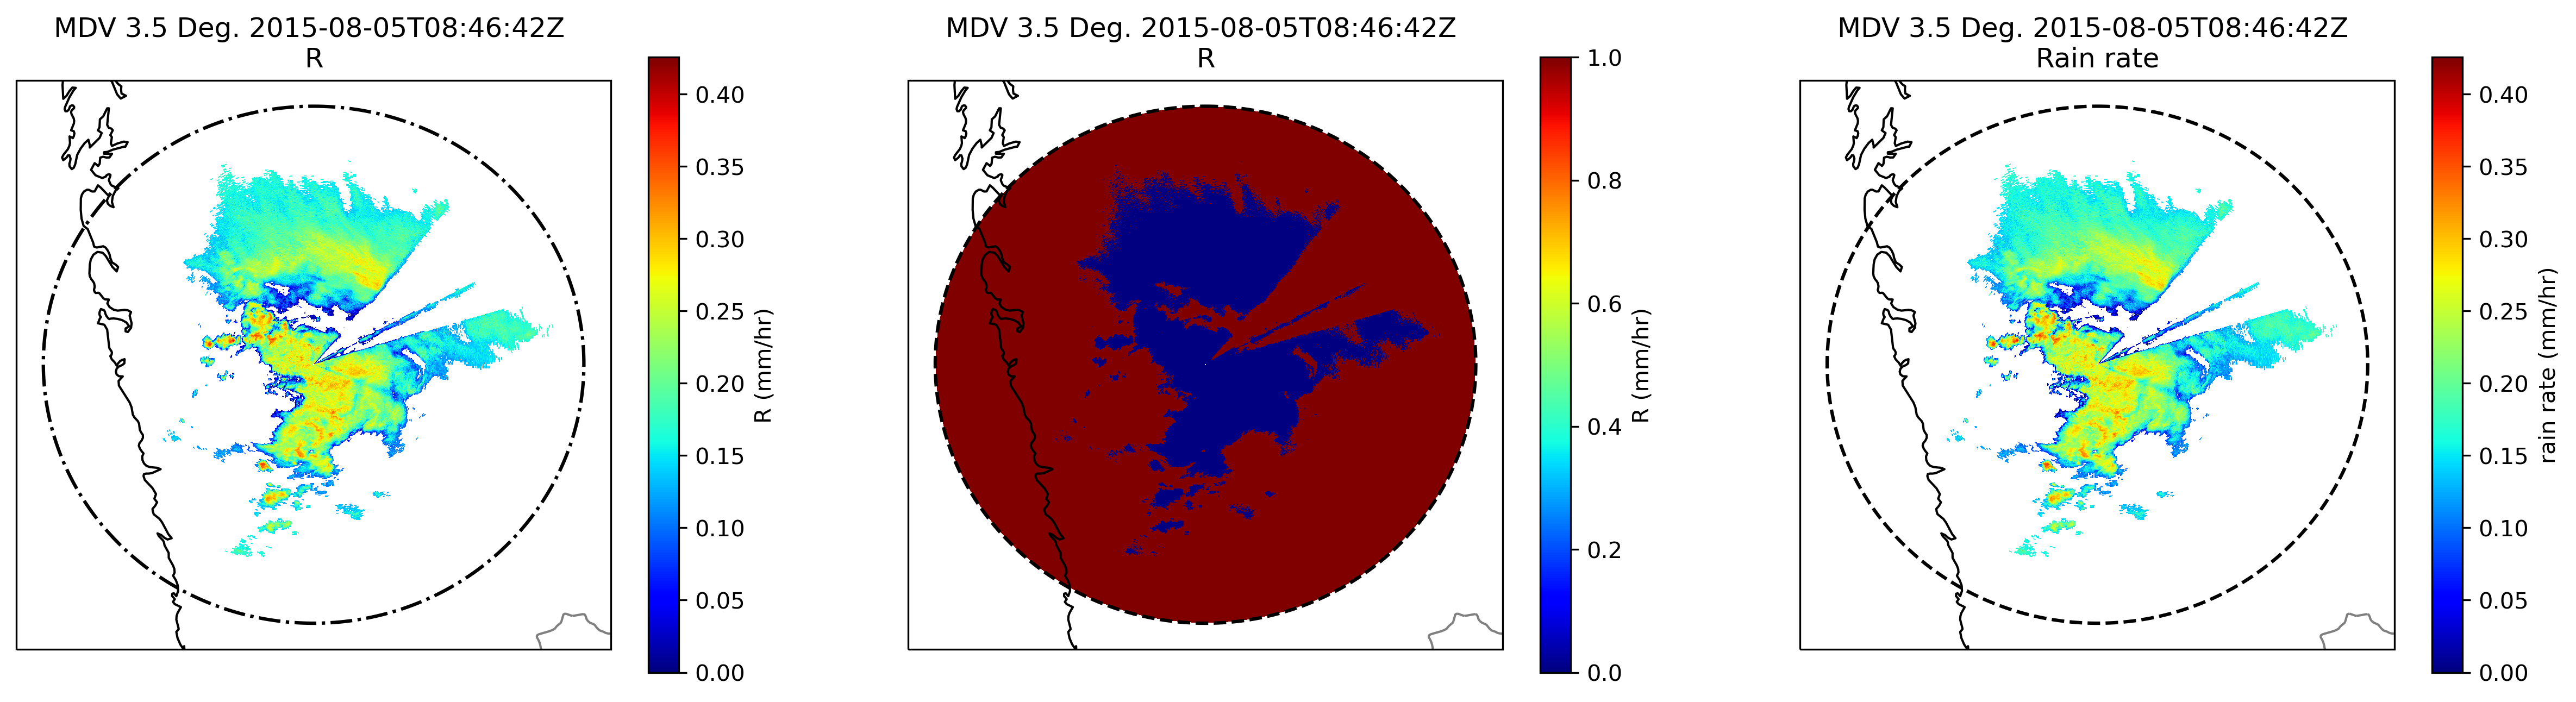

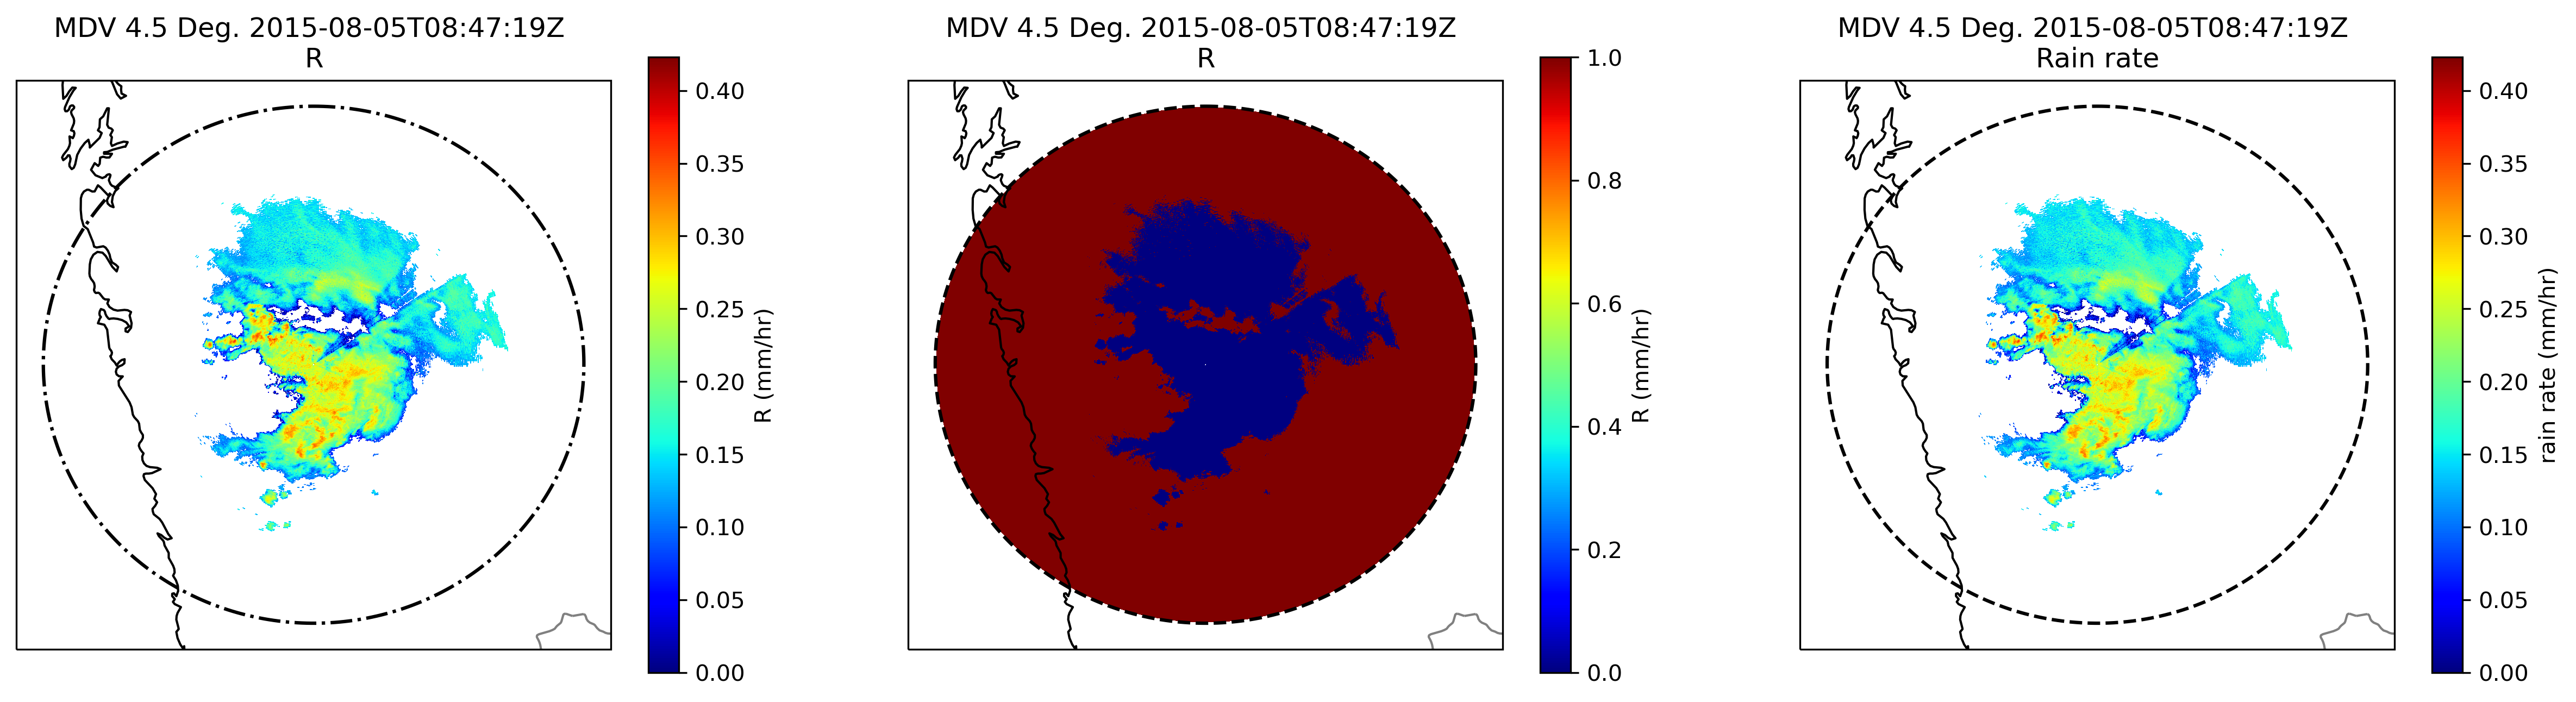

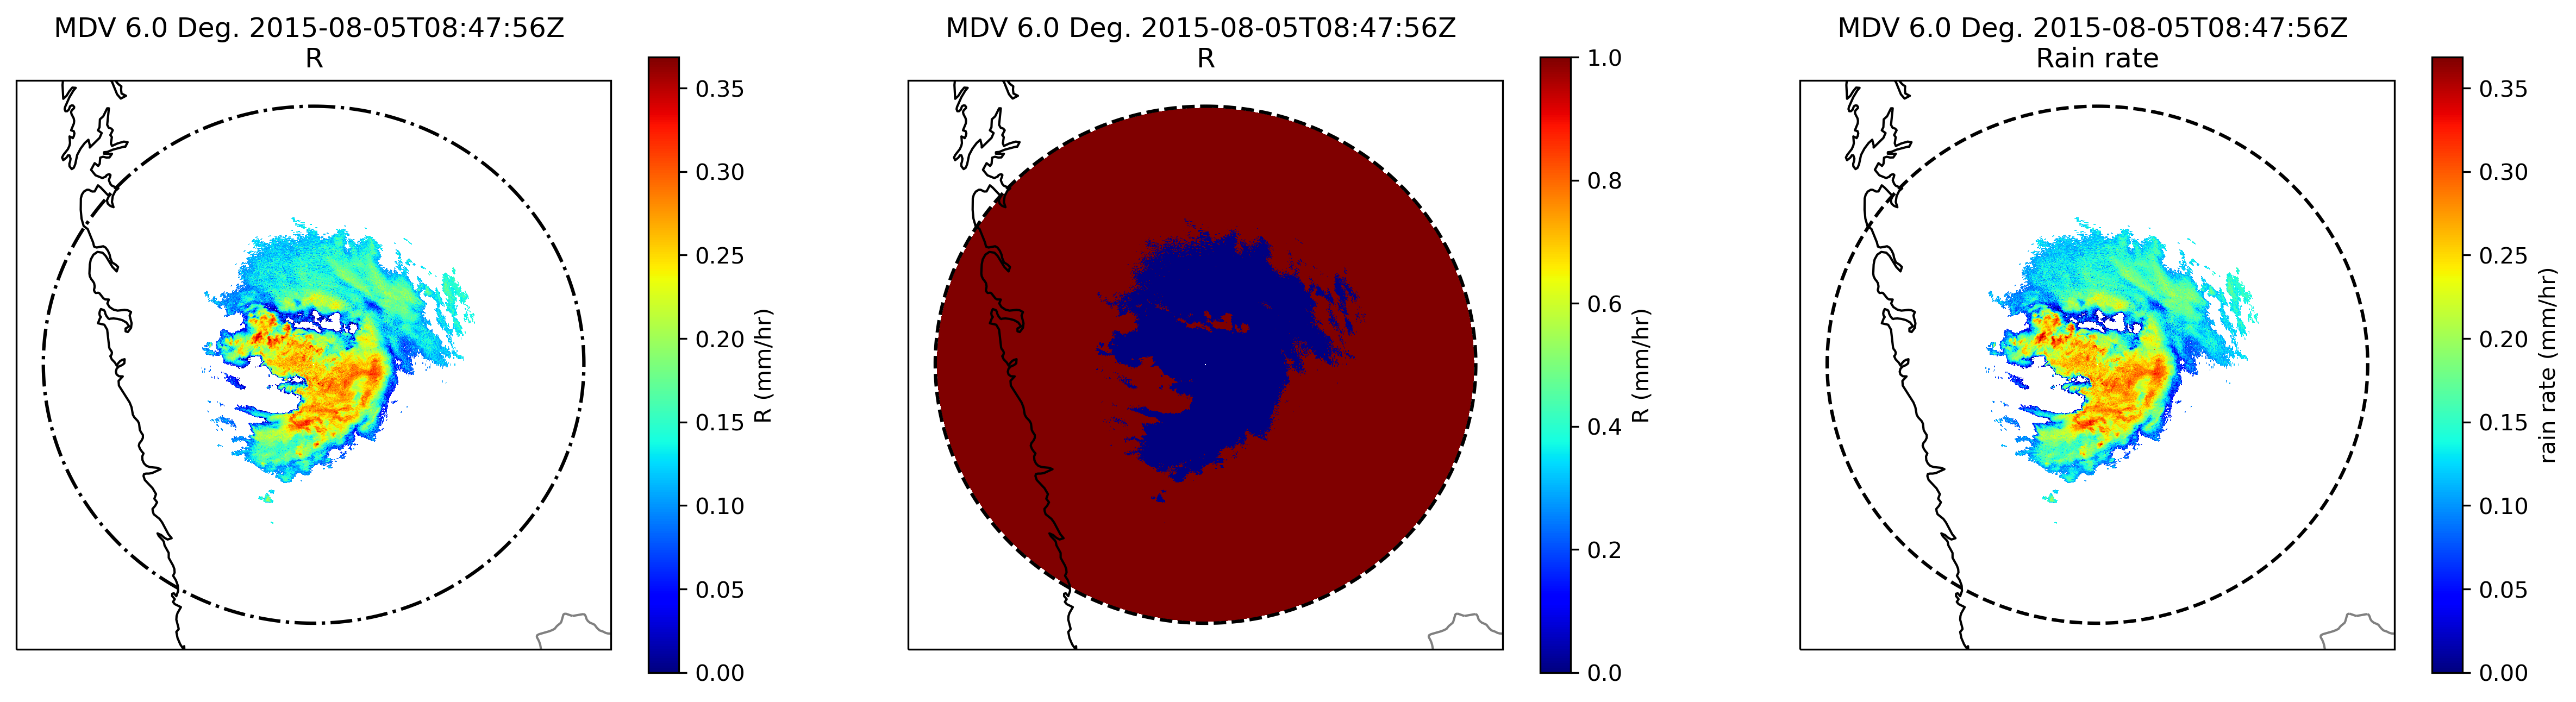

In [17]:
for i in range(6):
    fig = plt.figure(figsize=[20,5],dpi=300)
    ax = plt.subplot(1,3,1,projection=ccrs.PlateCarree())
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('R',sweep=i, resolution='10m',
                         projection=ccrs.PlateCarree(), cmap='jet',)
    display.plot_range_ring(radar.range['data'][2], line_style='k-.')

    ax = plt.subplot(1,3,2,projection=ccrs.PlateCarree())
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('RR', sweep=i, resolution='10m',
                         projection=ccrs.PlateCarree(),cmap='jet')
    display.plot_range_ring(radar.range['data'][2], line_style='k--')
    ax = plt.subplot(1,3,3,projection=ccrs.PlateCarree())
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('dr', sweep=i, resolution='10m',
                         
                         projection=ccrs.PlateCarree(),cmap='jet')
    display.plot_range_ring(radar.range['data'][2], line_style='k--')
    #fig.tight_layout()
    #plt.savefig('/Users/rizvi/Documents/Project/Jup/plots'+'//'+'R_MDV-20150805-084449-PPIVol'+ str(i+1) +'.jpg')
    #plt.clf()
    plt.show()